In [24]:
import requests

import geopandas as gpd
from shapely.geometry import Point, Polygon

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import sys
import os
base_dir = os.getcwd()
repo_name = "chicago_data"
root_path =base_dir.split(repo_name)[0] + repo_name 
sys.path.append(root_path)

In [96]:
from src.mapping.mapping import create_geo_df, create_chicago_map
from src.businesses.grocery_stores.grocery_stores import grocery_store_ids

In [5]:
# the Chicago Data Portal returns 1000 records at a time
# The data must be queried with the offset parameter 
business_df = pd.DataFrame()

for offset in range(0, 60000, 1000):
    active_business_url = f"https://data.cityofchicago.org/resource/uupf-x98q.json?$limit=1000&$offset={offset}"
    response = requests.get(active_business_url)
    offset_df = pd.DataFrame(response.json())
    business_df = pd.concat([business_df,offset_df])

In [6]:
business_df.head()

,license_description,zip_code,license_id,location,date_issued,city,ward_precinct,address,license_status,conditional_approval,...,license_number,license_approved_for_issuance,expiration_date,account_number,site_number,license_code,legal_name,id,ssa,application_created_date
0,Valet Parking Operator,60611,2977242,"{'latitude': '41.89019627869941', 'human_addre...",2024-07-17T00:00:00.000,CHICAGO,42-25,30 E HUBBARD ST,AAI,N,...,2917753,2024-07-16T00:00:00.000,2025-06-30T00:00:00.000,488915,10,2101,ADVANCE PARKING SERVICE INC.,2917753-20241116,NaN,NaN
1,Filling Station,60613,2980500,"{'latitude': '41.947207091228684', 'human_addr...",2024-07-16T00:00:00.000,CHICAGO,44-26,801 - 809 W ADDISON ST 1,AAI,N,...,2013751,2024-07-15T00:00:00.000,2026-09-15T00:00:00.000,349928,1,1275,RDK VENTURES LLC,2013751-20240916,18,NaN
2,Limited Business License,60652,2982102,"{'latitude': '41.75466012439374', 'human_addre...",2024-07-17T00:00:00.000,CHICAGO,18-43,7601 S CICERO AVE 1 1935,AAI,N,...,2749501,2024-07-16T00:00:00.000,2026-09-15T00:00:00.000,469773,1,1010,IL BLACK FRIDAY DEALS INC.,2749501-20240916,NaN,NaN
3,Regulated Business License,60645,2981432,"{'latitude': '42.007181785870934', 'human_addr...",2024-07-17T00:00:00.000,CHICAGO,40-35,2065 W MORSE AVE 1ST,AAI,N,...,2483943,2024-07-16T00:00:00.000,2026-09-15T00:00:00.000,408963,1,4404,"DR. HERBAL, ORGANIC COSMETICS ENTERPRISE, LLC",2483943-20240916,NaN,NaN
4,Regulated Business License,60605,2982381,"{'latitude': '41.87171754808042', 'human_addre...",2024-07-16T00:00:00.000,CHICAGO,4-25,808 S MICHIGAN AVE,AAI,N,...,2857458,2024-07-15T00:00:00.000,2026-09-15T00:00:00.000,487616,1,4404,BHI RESIDENTIAL LONG TERM CORPORATION,2857458-20240916,NaN,NaN


In [7]:
business_df.columns

Index(['license_description', 'zip_code', 'license_id', 'location',
       'date_issued', 'city', 'ward_precinct', 'address', 'license_status',
       'conditional_approval', 'state', 'payment_date', 'business_activity',
       'license_start_date', 'latitude', 'precinct',
       'application_requirements_complete', 'ward', 'doing_business_as_name',
       'police_district', 'business_activity_id', 'longitude',
       'application_type', 'license_number', 'license_approved_for_issuance',
       'expiration_date', 'account_number', 'site_number', 'license_code',
       'legal_name', 'id', 'ssa', 'application_created_date'],
      dtype='object')

# How Many Jewel's are in Chicago


In [23]:
grocery_store_ids["jewel"]["col_name"]

'legal name'

In [28]:

jewels = business_df[
    business_df[grocery_store_ids["jewel"]["col_name"]] == grocery_store_ids["jewel"]["name"]
]

In [29]:
jewels.head()

,license_description,zip_code,license_id,location,date_issued,city,ward_precinct,address,license_status,conditional_approval,...,license_number,license_approved_for_issuance,expiration_date,account_number,site_number,license_code,legal_name,id,ssa,application_created_date
32,Food - Shared Kitchen - Supplemental,60656,2951734,"{'latitude': '41.97454294770947', 'human_addre...",2024-04-24T00:00:00.000,CHICAGO,41-36,7342 W FOSTER AVE 1ST,AAI,N,...,2951734,2024-04-23T00:00:00.000,2026-03-15T00:00:00.000,259,26,8343,"JEWEL FOOD STORES, INC.",2951734-20240424,NaN,2024-01-24T00:00:00.000
324,Package Goods,60630,2948899,"{'latitude': '41.966797112000584', 'human_addr...",2024-01-18T00:00:00.000,CHICAGO,45-16,4729 N CENTRAL AVE 1ST,AAI,N,...,1339,2024-01-17T00:00:00.000,2026-03-15T00:00:00.000,259,7,1474,"JEWEL FOOD STORES, INC.",1339-20240316,NaN,NaN
358,Tobacco,60618,2948894,"{'latitude': '41.95910043303784', 'human_addre...",2024-01-18T00:00:00.000,CHICAGO,47-8,4250 N LINCOLN AVE 1,AAI,N,...,1328,2024-01-17T00:00:00.000,2025-03-15T00:00:00.000,259,4,1781,"JEWEL FOOD STORES, INC.",1328-20240316,38,NaN
368,Retail Food Establishment,60639,2948927,"{'latitude': '41.92629695632618', 'human_addre...",2024-01-18T00:00:00.000,CHICAGO,36-4,2520 N NARRAGANSETT AVE,AAI,N,...,1353385,2024-01-17T00:00:00.000,2026-03-15T00:00:00.000,259,53,1006,"JEWEL FOOD STORES, INC.",1353385-20240316,NaN,NaN
402,Retail Food Establishment,60649,2948918,"{'latitude': '41.75780565854321', 'human_addre...",2024-01-18T00:00:00.000,CHICAGO,8-2,7530 S STONY ISLAND AVE,AAI,N,...,1000572,2024-01-17T00:00:00.000,2026-03-15T00:00:00.000,259,37,1006,"JEWEL FOOD STORES, INC.",1000572-20240316,42,NaN


In [30]:
no_of_jewels = jewels["doing_business_as_name"].nunique()
print(f"Thee are {no_of_jewels} Jewels currently active in Chicago")

Thee are 30 Jewels currently active in Chicago


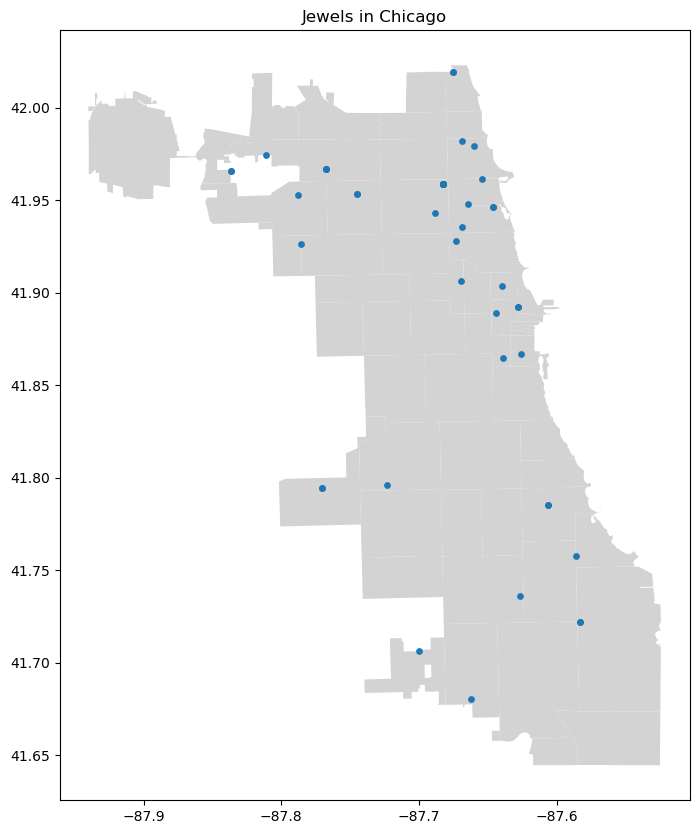

In [66]:
jewel_geo_df = create_geo_df(jewels)
create_chicago_map(jewel_geo_df, markersize=15, title="Jewels in Chicago")

# Whole Foods

In [31]:

wholefoods = business_df[
    business_df[grocery_store_ids["whole_foods"]["col_name"]] == grocery_store_ids["whole_foods"]["name"]
]

In [32]:
print(f"There are {wholefoods["address"].nunique()} currently registered in Chicago")

There are 12 currently registered in Chicago


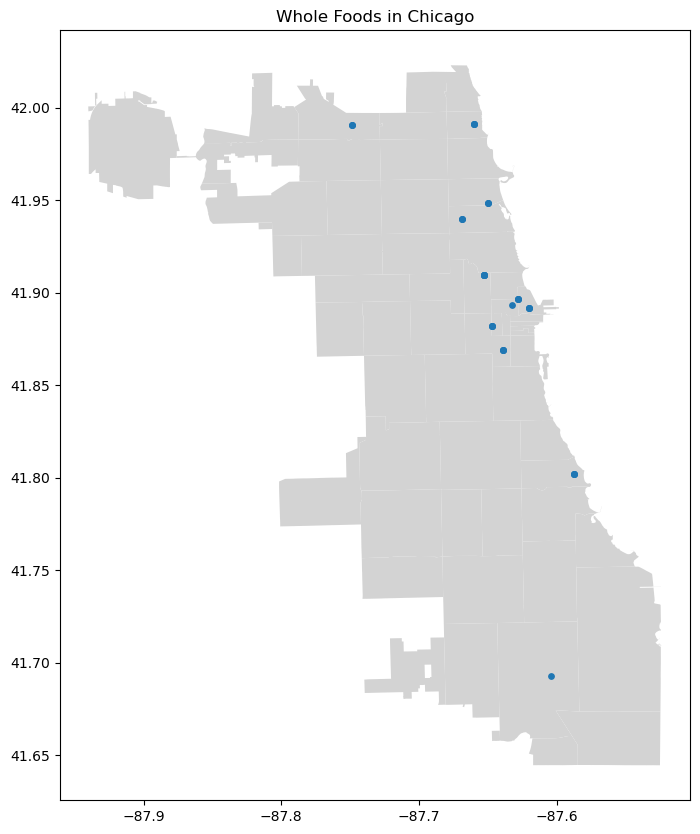

In [67]:
wf_geo_df = create_geo_df(wholefoods)
create_chicago_map(wf_geo_df, markersize=15, title="Whole Foods in Chicago")

# Mariano's

In [40]:
marianos = business_df[
    business_df[grocery_store_ids["marianos"]["col_name"]] == grocery_store_ids["marianos"]["name"]
]


In [41]:
print(f"There are {marianos["doing_business_as_name"].nunique()} Mariano's in Chicago")

There are 14 Mariano's in Chicago


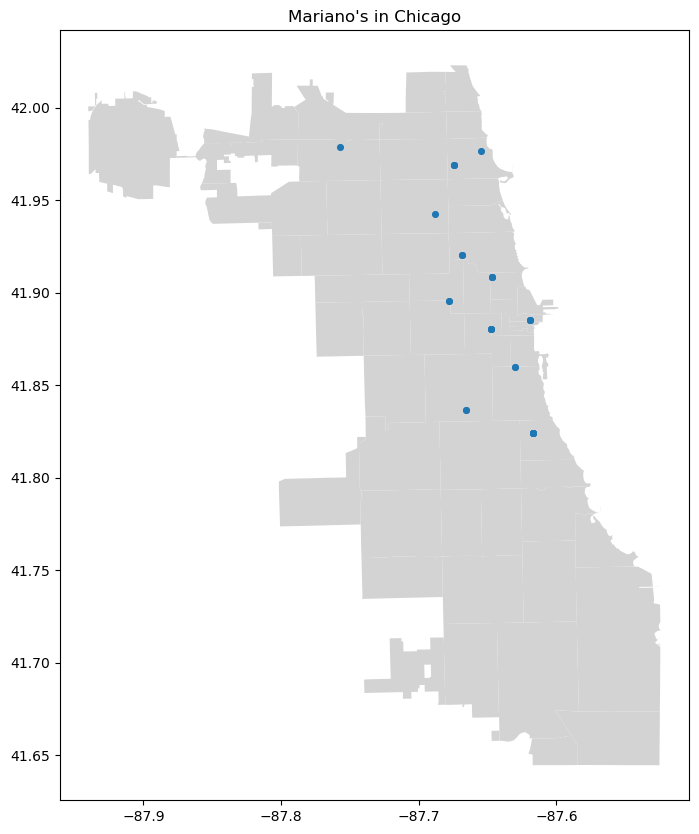

In [69]:
marianos_geo_df = create_geo_df(marianos)
create_chicago_map(marianos_geo_df, markersize=15, title="Mariano's in Chicago")

# Trader Joe's

In [42]:
trader_joes = business_df[
    business_df[grocery_store_ids["trader_joes"]["col_name"]] == grocery_store_ids["trader_joes"]["name"]
]

In [71]:
print(f"There are {trader_joes["address"].nunique()} Trader Joe's in Chicago")

There are 6 Trader Joe's in Chicago


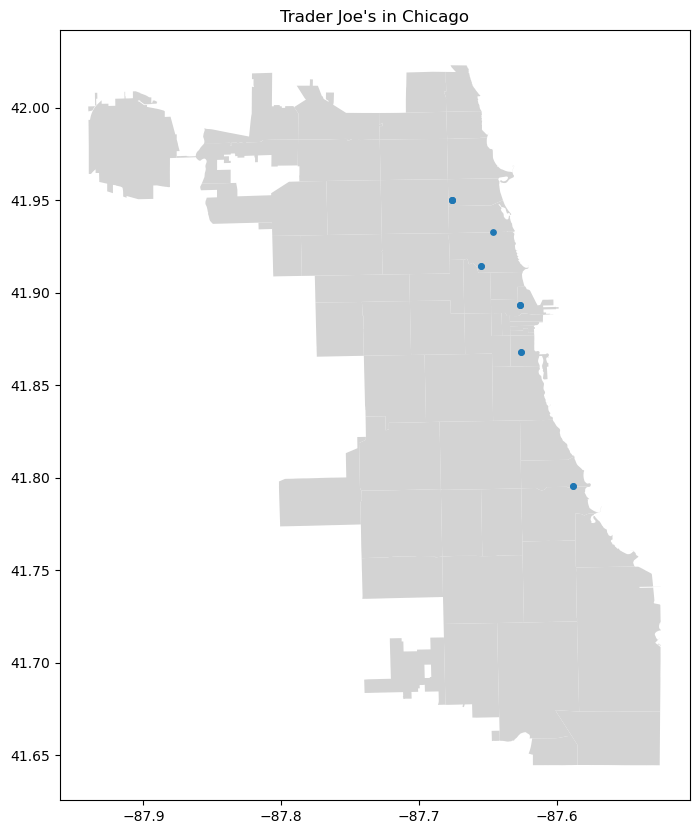

In [70]:
tj_geo_df = create_geo_df(trader_joes)
create_chicago_map(tj_geo_df, markersize=15, title="Trader Joe's in Chicago")

# Aldi

In [48]:
aldi = business_df[
    business_df[grocery_store_ids["aldi"]["col_name"]] == grocery_store_ids["aldi"]["name"]
]


In [49]:
print(f"There are {aldi["address"].nunique()} Aldi's in Chicago")

There are 32 Aldi's in Chicago


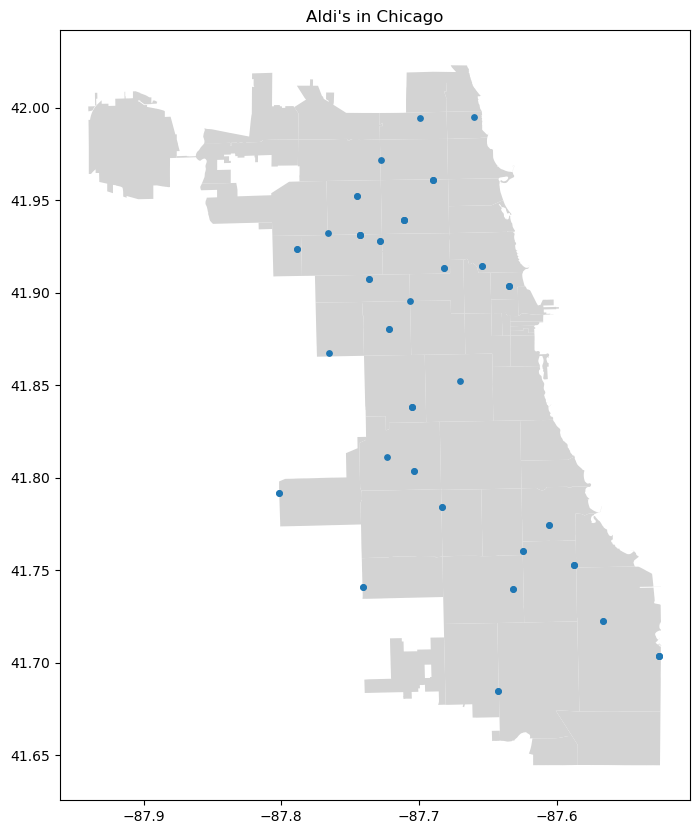

In [72]:
aldi_geo_df = create_geo_df(aldi)
create_chicago_map(aldi_geo_df, markersize=15, title="Aldi's in Chicago")

# Mapping

In [100]:
all_stores = pd.DataFrame()
for store in grocery_store_ids:
    print(store)
    grocery_df = business_df[
        business_df[grocery_store_ids[store]["col_name"]] == grocery_store_ids[store]["name"]
    ]
    grocery_df["name"] = store
    all_stores = pd.concat([all_stores, grocery_df])

jewel
whole_foods
marianos
trader_joes
aldi


In [101]:
all_stores_geo_df = create_geo_df(all_stores)

In [102]:
all_stores_geo_df.geometry.nunique()

92

In [103]:
all_stores_geo_df.head(10)

,license_description,zip_code,license_id,location,date_issued,city,ward_precinct,address,license_status,conditional_approval,...,expiration_date,account_number,site_number,license_code,legal_name,id,ssa,application_created_date,name,geometry
32,Food - Shared Kitchen - Supplemental,60656,2951734,"{'latitude': '41.97454294770947', 'human_addre...",2024-04-24T00:00:00.000,CHICAGO,41-36,7342 W FOSTER AVE 1ST,AAI,N,...,2026-03-15T00:00:00.000,259,26,8343,"JEWEL FOOD STORES, INC.",2951734-20240424,NaN,2024-01-24T00:00:00.000,jewel,POINT (-87.81135 41.97454)
324,Package Goods,60630,2948899,"{'latitude': '41.966797112000584', 'human_addr...",2024-01-18T00:00:00.000,CHICAGO,45-16,4729 N CENTRAL AVE 1ST,AAI,N,...,2026-03-15T00:00:00.000,259,7,1474,"JEWEL FOOD STORES, INC.",1339-20240316,NaN,NaN,jewel,POINT (-87.76730 41.96680)
358,Tobacco,60618,2948894,"{'latitude': '41.95910043303784', 'human_addre...",2024-01-18T00:00:00.000,CHICAGO,47-8,4250 N LINCOLN AVE 1,AAI,N,...,2025-03-15T00:00:00.000,259,4,1781,"JEWEL FOOD STORES, INC.",1328-20240316,38,NaN,jewel,POINT (-87.68239 41.95910)
368,Retail Food Establishment,60639,2948927,"{'latitude': '41.92629695632618', 'human_addre...",2024-01-18T00:00:00.000,CHICAGO,36-4,2520 N NARRAGANSETT AVE,AAI,N,...,2026-03-15T00:00:00.000,259,53,1006,"JEWEL FOOD STORES, INC.",1353385-20240316,NaN,NaN,jewel,POINT (-87.78569 41.92630)
402,Retail Food Establishment,60649,2948918,"{'latitude': '41.75780565854321', 'human_addre...",2024-01-18T00:00:00.000,CHICAGO,8-2,7530 S STONY ISLAND AVE,AAI,N,...,2026-03-15T00:00:00.000,259,37,1006,"JEWEL FOOD STORES, INC.",1000572-20240316,42,NaN,jewel,POINT (-87.58627 41.75781)
409,Retail Food Establishment,60622,2948911,"{'latitude': '41.906243703084954', 'human_addr...",2024-01-18T00:00:00.000,CHICAGO,1-21,1341 N PAULINA ST 1,AAI,N,...,2026-03-15T00:00:00.000,259,29,1006,"JEWEL FOOD STORES, INC.",1398-20240316,33,NaN,jewel,POINT (-87.66986 41.90624)
478,Retail Food Establishment,60640,2948910,"{'latitude': '41.98218988461361', 'human_addre...",2024-01-18T00:00:00.000,CHICAGO,40-33,5516 N CLARK ST 1ST,AAI,N,...,2026-03-15T00:00:00.000,259,27,1006,"JEWEL FOOD STORES, INC.",1394-20240316,22,NaN,jewel,POINT (-87.66865 41.98219)
506,Retail Food Establishment,60656,2948902,"{'latitude': '41.96601140133553', 'human_addre...",2024-01-18T00:00:00.000,CHICAGO,38-12,4734 N CUMBERLAND AVE 1ST #,AAI,N,...,2026-03-15T00:00:00.000,259,19,1006,"JEWEL FOOD STORES, INC.",1372-20240316,NaN,NaN,jewel,POINT (-87.83683 41.96601)
519,Retail Food Establishment,60626,2948937,"{'latitude': '42.01928855008811', 'human_addre...",2024-01-18T00:00:00.000,CHICAGO,49-5,1763 W HOWARD ST 1ST,AAI,N,...,2026-03-15T00:00:00.000,259,61,1006,"JEWEL FOOD STORES, INC.",2320250-20240316,19,NaN,jewel,POINT (-87.67506 42.01929)
550,Retail Food Establishment,60620,2948901,"{'latitude': '41.7361451282369', 'human_addres...",2024-01-18T00:00:00.000,CHICAGO,21-44,87 W 87TH ST 1,AAI,N,...,2026-03-15T00:00:00.000,259,17,1006,"JEWEL FOOD STORES, INC.",1368-20240316,NaN,NaN,jewel,POINT (-87.62692 41.73615)


In [104]:
colors = {}
for store in grocery_store_ids:
    colors[store] = grocery_store_ids[store]["color"]

In [112]:
all_stores_geo_df["color"] = all_stores_geo_df["name"].map(colors)
all_stores_geo_df["color"].fillna("black", inplace=True)

In [120]:
colors

{'jewel': 'red',
 'whole_foods': 'orange',
 'marianos': 'yellow',
 'trader_joes': 'green',
 'aldi': 'blue'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


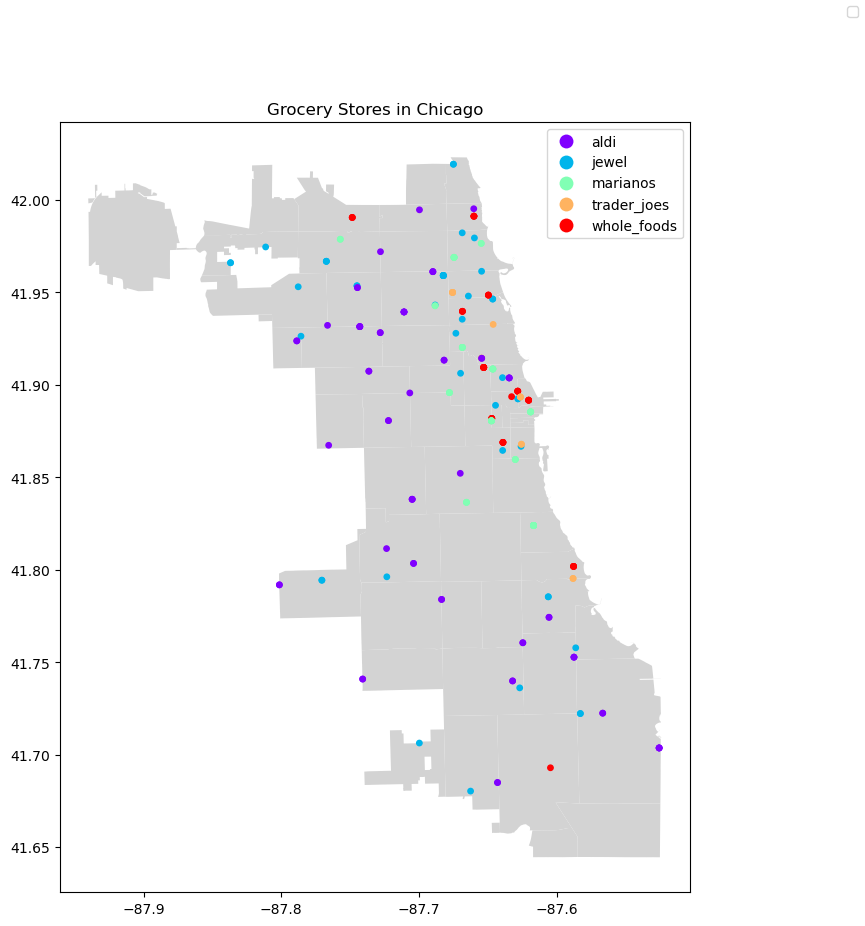

In [136]:
fig, ax = create_chicago_map(
    all_stores_geo_df,
    markersize=15, 
    color=True, title='Grocery Stores in Chicago'
)
fig.legend()
